In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import Task1

In [30]:
final_data = Task1.final_data
X ,y= Task1.X,Task1.y
x_train, x_test, y_train, y_test = Task1.x_train,Task1.x_test,Task1.y_train,Task1.y_test

## SelectKBest

C:\Users\SYX\AppData\Roaming\Python\Python36\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\SYX\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


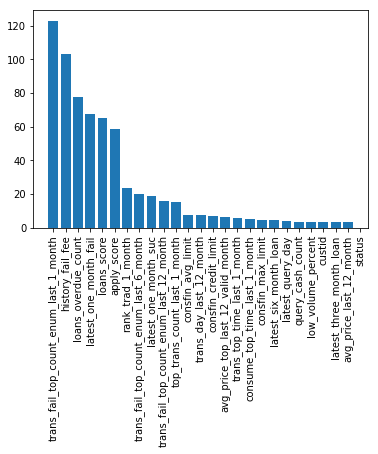

In [31]:
from sklearn.feature_selection import SelectKBest, f_classif
predictors = final_data.columns

# 特征选择
selector = SelectKBest(f_classif, k=5)
selector.fit(final_data[predictors], final_data["status"])

scores = -np.log10(selector.pvalues_)

plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

## XGboost

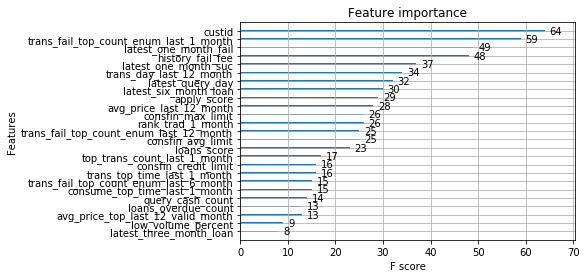

In [32]:
from xgboost import plot_importance
from xgboost import XGBClassifier

# 相关性探索 
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()

In [33]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.68%


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# grid search
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)#字典格式
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f  with: %r" % (mean, param))

Best: -0.451900 using {'learning_rate': 0.1}
-0.689585  with: {'learning_rate': 0.0001}
-0.660450  with: {'learning_rate': 0.001}
-0.519327  with: {'learning_rate': 0.01}
-0.451900  with: {'learning_rate': 0.1}
-0.456497  with: {'learning_rate': 0.2}
-0.467069  with: {'learning_rate': 0.3}


## 随机森林

['trans_fail_top_count_enum_last_1_month', 'history_fail_fee', 'loans_overdue_count', 'latest_one_month_fail', 'loans_score', 'apply_score', 'rank_trad_1_month', 'trans_fail_top_count_enum_last_6_month', 'latest_one_month_suc', 'trans_fail_top_count_enum_last_12_month', 'top_trans_count_last_1_month', 'consfin_avg_limit', 'trans_day_last_12_month', 'consfin_credit_limit', 'avg_price_top_last_12_valid_month', 'trans_top_time_last_1_month', 'consume_top_time_last_1_month', 'consfin_max_limit', 'latest_six_month_loan', 'latest_query_day', 'query_cash_count', 'low_volume_percent', 'custid', 'latest_three_month_loan', 'avg_price_last_12_month', 'status']
 1) trans_fail_top_count_enum_last_1_month 0.080063

C:\Users\SYX\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



 2) history_fail_fee               0.072523
 3) loans_overdue_count            0.065652
 4) latest_one_month_fail          0.062286
 5) loans_score                    0.058970
 6) apply_score                    0.045741
 7) rank_trad_1_month              0.044563
 8) trans_fail_top_count_enum_last_6_month 0.043359
 9) latest_one_month_suc           0.042974
10) trans_fail_top_count_enum_last_12_month 0.040271
11) top_trans_count_last_1_month   0.039636
12) consfin_avg_limit              0.039030
13) trans_day_last_12_month        0.038581
14) consfin_credit_limit           0.035260
15) avg_price_top_last_12_valid_month 0.033561
16) trans_top_time_last_1_month    0.033541
17) consume_top_time_last_1_month  0.031018
18) consfin_max_limit              0.030692
19) latest_six_month_loan          0.030350
20) latest_query_day               0.030126
21) query_cash_count               0.028923
22) low_volume_percent             0.027328
23) latest_three_month_loan        0.026689
24) avg_pri

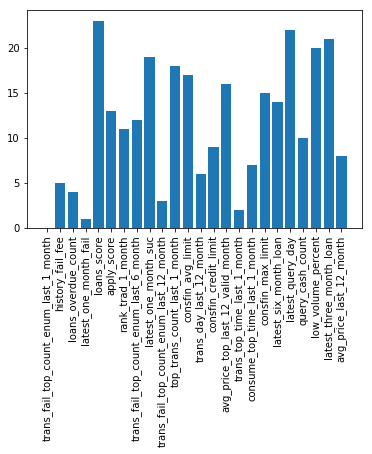

In [36]:
from sklearn.ensemble import RandomForestClassifier

column_headers = list(final_data.columns.values)
print(column_headers)
x_columns = []  # X的列属性(x变量)
for i in range(len(column_headers)):
    if column_headers[i] not in ['reg_preference_for_trad','latest_query_time','loans_latest_time','status','bank_card_no','source','id_name','unnameid','custid','student_feature','trade_no']:
        x_columns.append(column_headers[i])  
        
X = final_data[x_columns]  # 获取x变量
Y = final_data['status']   # label

clf = RandomForestClassifier()
clf.fit(X, Y)

importance = clf.feature_importances_
indices = np.argsort(importance)[::-1]
features = X.columns
for f in range(X.shape[1]):
 print(("%2d) %-*s %f" % (f + 1, 30, features[f], importance[indices[f]])))

plt.bar(range(len(features)), indices)
plt.xticks(range(len(features)), features, rotation='vertical')
plt.show()



## IV值
calc_iv 参考https://blog.csdn.net/weixin_35688006/article/details/88425262

In [ ]:
def calc_iv(df, feature, target, pr = False):
    """
    Set pr=True to enable printing of output.
    
    Output: 
      * iv: float,
      * data: pandas.DataFrame
    """
    
    lst = []
    df[feature] = df[feature].fillna('NULL')
    
    for i in range(df[feature].nunique()):   # nuinque()是查看该序列(axis=0/1对应着列或行)的不同值的数量个数
        val = list(df[feature].unique())[i]
        lst.append([feature,
                   val,                                                           # Value
                   df[df[feature] == val].count()[feature],                       # all
                   df[(df[feature] == val) & (df[target] == 0)].count()[feature], # good rate
                   df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # bad rate
    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])
    
    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    
    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    
    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))
    
    if pr:
        print(data)
        print("IV = ", data['IV'].sum())
        
    iv = data['IV'].sum()
    
    return iv, data

column_headers = list(final_data.columns.values)
#print(column_headers)
del column_headers[11]
for x in column_headers:
     IV_1,data = calc_iv(final_data, x, 'status')
     print('{}： {}'.format(x, IV_1))



# for example:
# calc_iv(df, 'NET_TM', 'overdue')


C:\Users\SYX\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


trans_fail_top_count_enum_last_1_month： 0.6013413874042366
history_fail_fee： 0.469410057821934
loans_overdue_count： 0.37270254172319317
latest_one_month_fail： 0.2523932829815602
loans_score： 0.6203291771334889
apply_score： 0.482723098869688
rank_trad_1_month： 0.12712947313201026
trans_fail_top_count_enum_last_6_month： 0.28218187485944196
latest_one_month_suc： 0.14336539134680829
trans_fail_top_count_enum_last_12_month： 0.2702768519374171
top_trans_count_last_1_month： 0.07268512755482852
trans_day_last_12_month： 0.16963543055037533
consfin_credit_limit： 0.21258051751571733
avg_price_top_last_12_valid_month： 0.044629399782024855
trans_top_time_last_1_month： 0.09919611211958897
consume_top_time_last_1_month： 0.09285835689753491
consfin_max_limit： 0.1109240465539098
latest_six_month_loan： 0.0746896066872364
latest_query_day： 0.13667189468916177
query_cash_count： 0.03179843141610979
low_volume_percent： 0.03435233000814904
